# Conlusões
*   Orinoco Belt localizada na parte central da Venezuela e ao norte do rio Orinoco da Venezuela, é a maior reserva de petróleo do País com uma quantidade aproximada de 3MM barril/dia
*   A Venezuela conta com 12 Reservas ativas e 5 em desenvolvimento
*   Em 2010 a Venezuela contava com 5 reservas em desenvolvimento para exploração
*   Também em 2010 foi o ano com maior quantidade de barril/dia (entre 400k a 500k)
*   A partir de 2010 a quantidade de Reservas em desenvolvimento possuem capacidade barril/dia superior que todas as Reservas Ativas.
*   A PDVSA (Estatal Venezuelana) possui parcerias com outras companias internacionais como : Rosneft, CNPC, ExxonMobil e Chevron
*   De todas as Reservas Ativas, a compania que obtem maior participação na exploração é a PDVSA - Rosneft ( a PDVSA- Estatal Venezuelana, e Rosneft - Estatal Russa fizeram uma parceria estratégica para exploração de petróleo e gás em troca de financiamento e contornar as sanções dos EUA)
*   Tipo de petróleo mais extraído é o Extra Heavy Crude ( Petróleo mais denso , mais difícil de extrair )
* 60% da produção de barril/dia é do tipo Extra Heavy Crude


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [67]:
# importando o arquivo .csv
df = pd.read_csv('/content/Reservoir_NameBasin_RegionLocatio.csv')

In [68]:
df.head(3)

,Reservoir_Name,Basin_Region,Location,Proven_Reserves_Billion_Barrels,Estimated_Recoverable_Reserves_Billion_Barrels,Production_Capacity_Barrels_Day,Oil_Type_Grade,Status,Major_Operators,Year_Discovered,Notes
0,Orinoco Belt (Total),Orinoco Belt,Eastern Venezuela (Anzoategui-Monagas-Guarico),235.0,100.00-270.00,400000,Extra Heavy Crude,Active,PDVSA-Rosneft-CNPC,2007,World's largest heavy oil deposit spanning 550...
1,Carabobo-2 North,Orinoco Belt,Carabobo State,6.5,2.5,400000,Extra Heavy Crude,Development,PDVSA-Repsol-ONGC,2010,Part of Carabobo-2 project with 40 billion bar...
2,Carabobo-4 West,Orinoco Belt,Carabobo State,6.5,2.5,400000,Extra Heavy Crude,Development,PDVSA-Repsol-ONGC,2010,Combined with Carabobo-2 North for 400000 bpd ...


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Reservoir_Name                                  23 non-null     object 
 1   Basin_Region                                    23 non-null     object 
 2   Location                                        23 non-null     object 
 3   Proven_Reserves_Billion_Barrels                 23 non-null     float64
 4   Estimated_Recoverable_Reserves_Billion_Barrels  23 non-null     object 
 5   Production_Capacity_Barrels_Day                 23 non-null     int64  
 6   Oil_Type_Grade                                  23 non-null     object 
 7   Status                                          23 non-null     object 
 8   Major_Operators                                 23 non-null     object 
 9   Year_Discovered                              

In [70]:
df['Proven_Reserves_Billion_Barrels']= pd.to_numeric(df['Proven_Reserves_Billion_Barrels'], errors='coerce')
df['Production_Capacity_Barrels_Day'] = pd.to_numeric(df['Production_Capacity_Barrels_Day'], errors='coerce')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Reservoir_Name                                  23 non-null     object 
 1   Basin_Region                                    23 non-null     object 
 2   Location                                        23 non-null     object 
 3   Proven_Reserves_Billion_Barrels                 23 non-null     float64
 4   Estimated_Recoverable_Reserves_Billion_Barrels  23 non-null     object 
 5   Production_Capacity_Barrels_Day                 23 non-null     int64  
 6   Oil_Type_Grade                                  23 non-null     object 
 7   Status                                          23 non-null     object 
 8   Major_Operators                                 23 non-null     object 
 9   Year_Discovered                              

In [72]:
# vemos que alguns anos possuem o "s" no final, simbolizando que foi descoberto na década. Ex: 1920s = década de 20
df['Year_Discovered'].unique()

df['Year'] = df['Year_Discovered'].str.replace('s', '').astype(int)

In [73]:
np.sort(df['Year'].unique())

array([1914, 1920, 1926, 1928, 1946, 1950, 1960, 1970, 1980, 1990, 2007,
       2010])

In [74]:
# na coluna Estimated_Recoverable_Reserves_Billion_Barrels há um campo onde não há um valor exato, entao dividiremos em 2 colunas min e max dos valores
split = df['Estimated_Recoverable_Reserves_Billion_Barrels'].astype(str).str.split('-', expand=True)

df['rec_min'] = split[0].astype(float)
df['rec_max'] = split[1].astype(float).fillna(df['rec_min'])

dataset_colunas_ordenadas = ['Reservoir_Name', 'Basin_Region', 'Location','Proven_Reserves_Billion_Barrels','Estimated_Recoverable_Reserves_Billion_Barrels','rec_min','rec_max','Production_Capacity_Barrels_Day','Oil_Type_Grade','Status','Major_Operators','Year_Discovered','Year','Notes']
df = df[dataset_colunas_ordenadas]

In [75]:
df.head()

,Reservoir_Name,Basin_Region,Location,Proven_Reserves_Billion_Barrels,Estimated_Recoverable_Reserves_Billion_Barrels,rec_min,rec_max,Production_Capacity_Barrels_Day,Oil_Type_Grade,Status,Major_Operators,Year_Discovered,Year,Notes
0,Orinoco Belt (Total),Orinoco Belt,Eastern Venezuela (Anzoategui-Monagas-Guarico),235.0,100.00-270.00,100.0,270.0,400000,Extra Heavy Crude,Active,PDVSA-Rosneft-CNPC,2007,2007,World's largest heavy oil deposit spanning 550...
1,Carabobo-2 North,Orinoco Belt,Carabobo State,6.5,2.5,2.5,2.5,400000,Extra Heavy Crude,Development,PDVSA-Repsol-ONGC,2010,2010,Part of Carabobo-2 project with 40 billion bar...
2,Carabobo-4 West,Orinoco Belt,Carabobo State,6.5,2.5,2.5,2.5,400000,Extra Heavy Crude,Development,PDVSA-Repsol-ONGC,2010,2010,Combined with Carabobo-2 North for 400000 bpd ...
3,Junin Block 6,Orinoco Belt,Anzoategui State,8.0,3.2,3.2,3.2,450000,Extra Heavy Crude,Development,Rosneft-Gazprom Neft-Lukoil,2010,2010,Russian consortium development project
4,Junin Block 4,Orinoco Belt,Anzoategui State,7.0,2.8,2.8,2.8,400000,Extra Heavy Crude,Development,CNPC-PDVSA,2010,2010,Chinese-Venezuelan joint venture


# Análise Exploratória

In [76]:
região_bacia_petrolifera = df.groupby(['Basin_Region'])['Production_Capacity_Barrels_Day'].sum().sort_values(ascending=False)
região_bacia_petrolifera.head()

,Production_Capacity_Barrels_Day
Basin_Region,
Orinoco Belt,3110000
Maracaibo Basin,490000
Oriente Basin,355000
Apure Basin,95000
Falcon Basin,60000


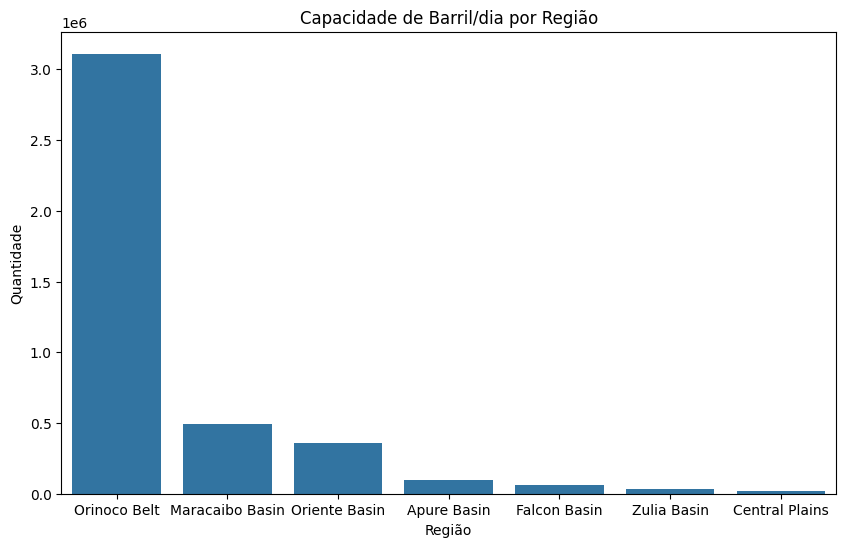

In [77]:
plt.subplots(figsize=(10, 6))
sns.barplot(x=região_bacia_petrolifera.index, y=região_bacia_petrolifera.values)
plt.title('Capacidade de Barril/dia por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade')
plt.show()

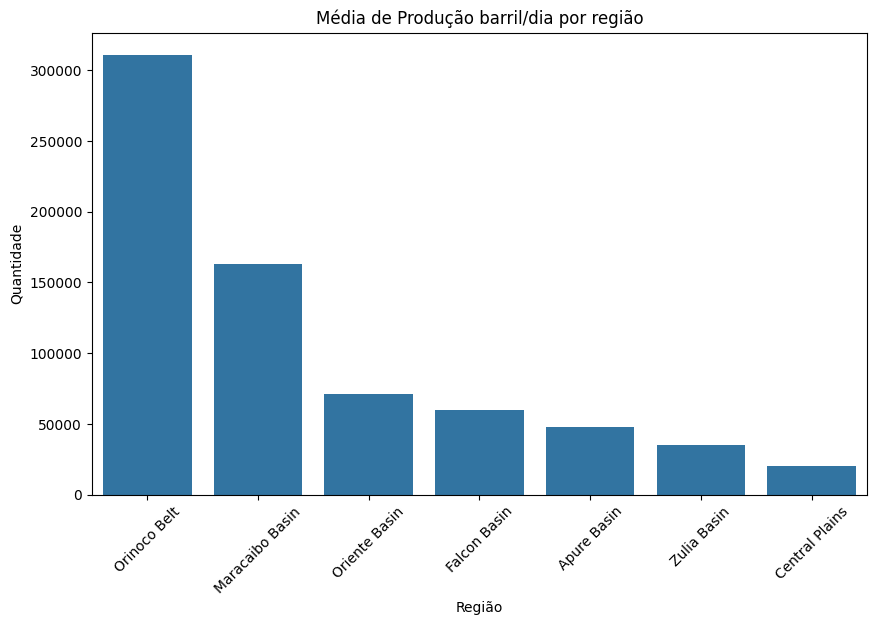

In [78]:
media_barril_por_regiao = df.groupby('Basin_Region')['Production_Capacity_Barrels_Day'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=media_barril_por_regiao.index, y=media_barril_por_regiao.values)
plt.title('Média de Produção barril/dia por região')
plt.xlabel('Região')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

In [79]:
status_reservas = df['Status'].value_counts()
status_reservas

,count
Status,
Active,12
Development,5
Mature,3
Declining,3


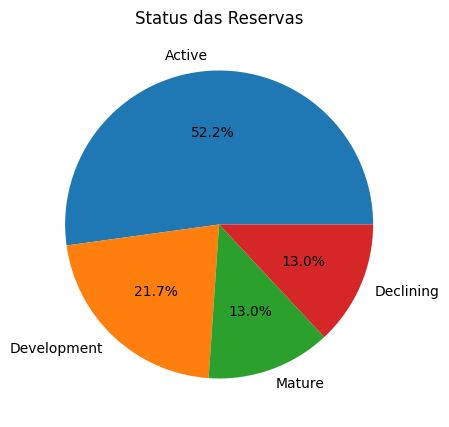

In [80]:
status_reservas.plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5))
plt.title('Status das Reservas')
plt.ylabel('')
plt.show()

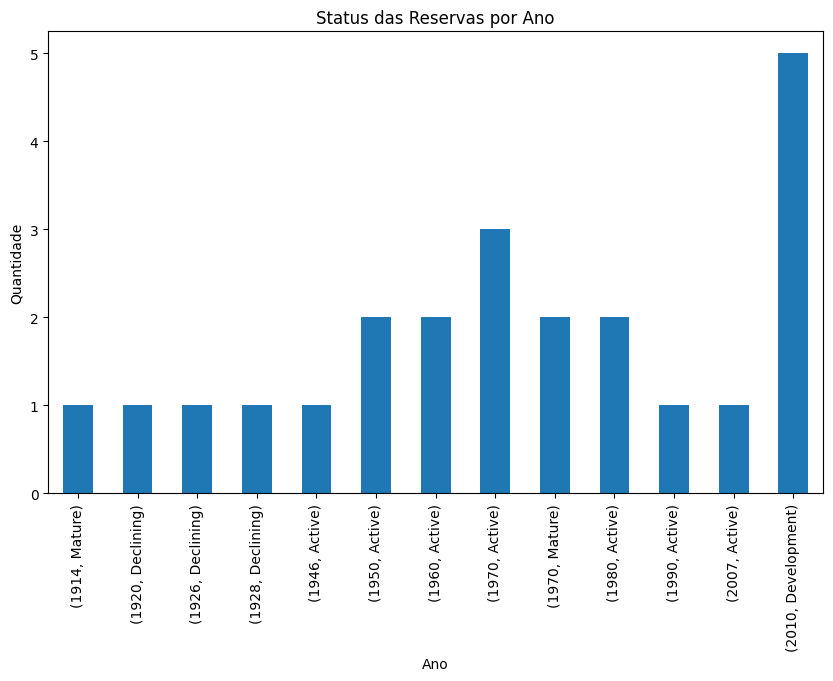

In [81]:
status_reservas_por_ano = df.groupby('Year')['Status'].value_counts()
status_reservas_por_ano.plot(kind='bar', figsize=(10, 6))
plt.title('Status das Reservas por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()

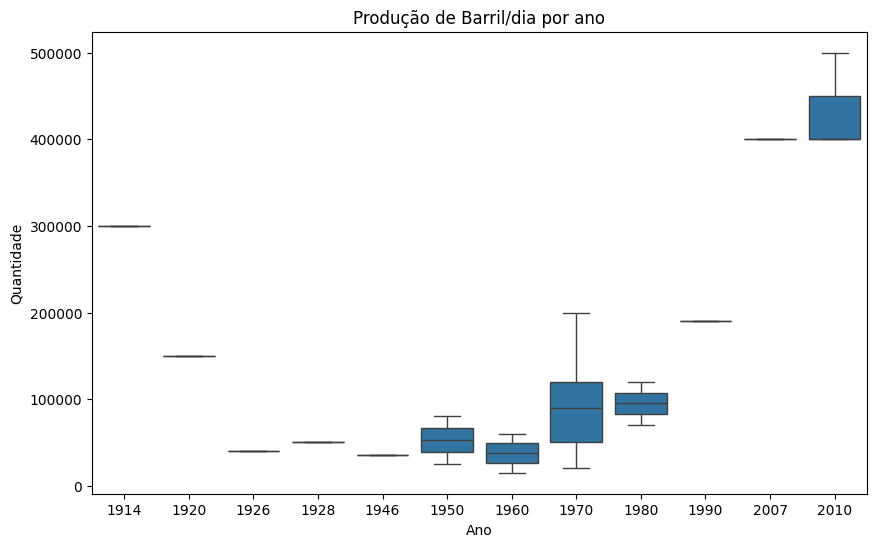

In [82]:
plt.subplots(figsize=(10, 6))
sns.boxplot(x=df['Year'], y=df['Production_Capacity_Barrels_Day'])
plt.title('Produção de Barril/dia por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()


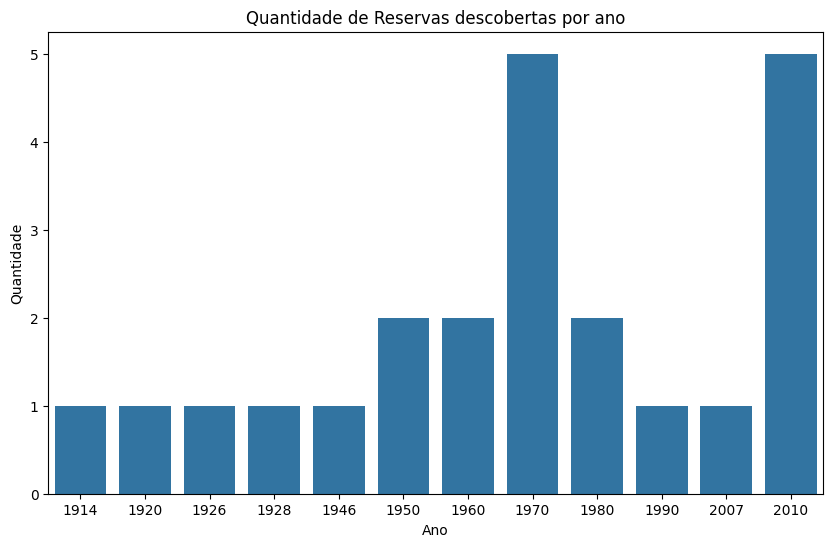

In [83]:
plt.subplots(figsize=(10, 6))
sns.countplot(x=df['Year'])
plt.title('Quantidade de Reservas descobertas por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()

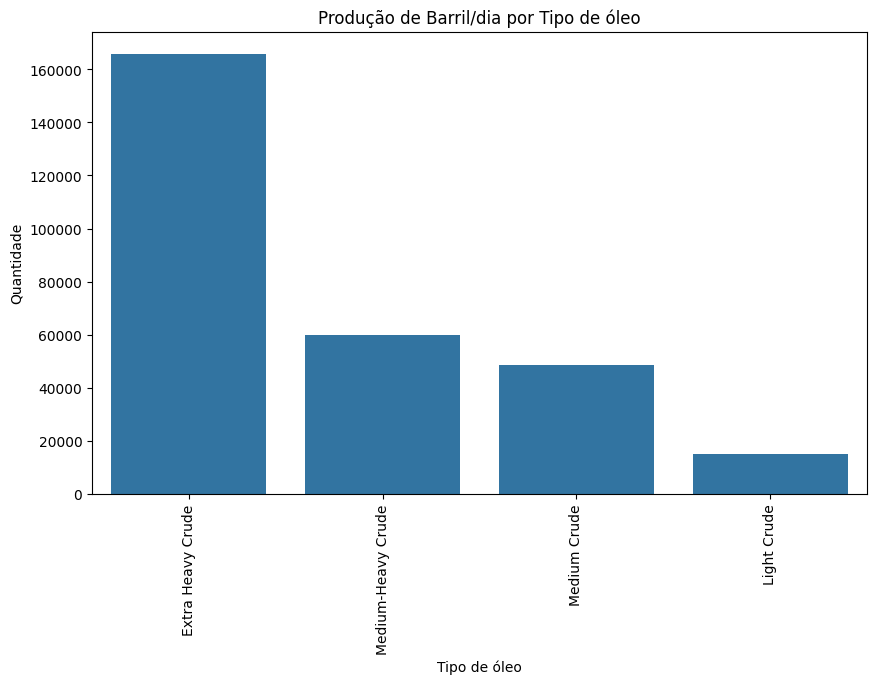

In [84]:
media_producao_dia_tipo_oleo_ativas = df[df['Status'] == 'Active'].groupby('Oil_Type_Grade')['Production_Capacity_Barrels_Day'].mean().sort_values(ascending=False)

plt.subplots(figsize=(10, 6))
sns.barplot(x=media_producao_dia_tipo_oleo_ativas.index, y = media_producao_dia_tipo_oleo_ativas.values)
plt.title('Produção de Barril/dia por Tipo de óleo')
plt.xlabel('Tipo de óleo')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

In [92]:
media_producao_dia_tipo_oleo_ativas
total = media_producao_dia_tipo_oleo_ativas.sum()
percent = round(media_producao_dia_tipo_oleo_ativas / total * 100,2)

df_media_producao_dia_tipo_oleo_ativas = media_producao_dia_tipo_oleo_ativas.to_frame()
df_media_producao_dia_tipo_oleo_ativas['Percent'] = percent
df_media_producao_dia_tipo_oleo_ativas

,Production_Capacity_Barrels_Day,Percent
Oil_Type_Grade,,
Extra Heavy Crude,165833.333333,57.27
Medium-Heavy Crude,60000.000000,20.72
Medium Crude,48750.000000,16.83
Light Crude,15000.000000,5.18


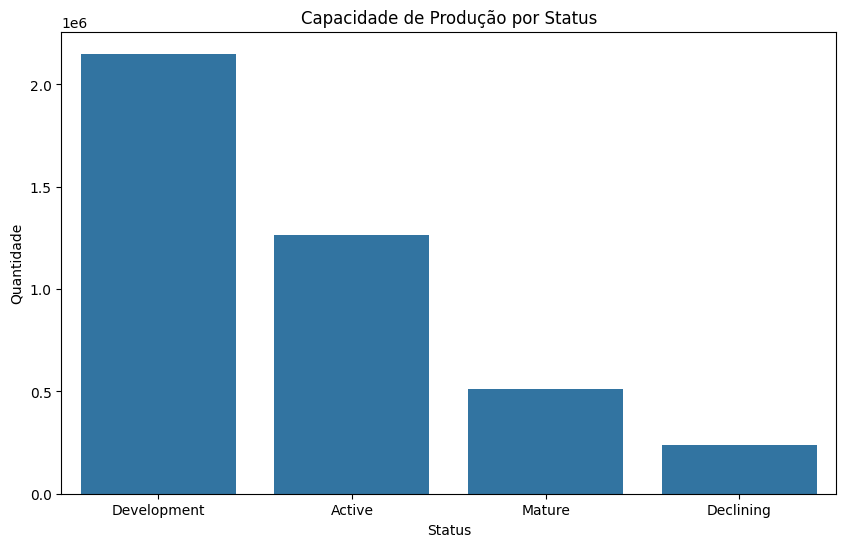

In [86]:
capacidade_producao_por_status = df.groupby('Status')['Production_Capacity_Barrels_Day'].sum().sort_values(ascending=False)

plt.subplots(figsize=(10, 6))
sns.barplot(x=capacidade_producao_por_status.index, y=capacidade_producao_por_status.values)
plt.title('Capacidade de Produção por Status')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.show()

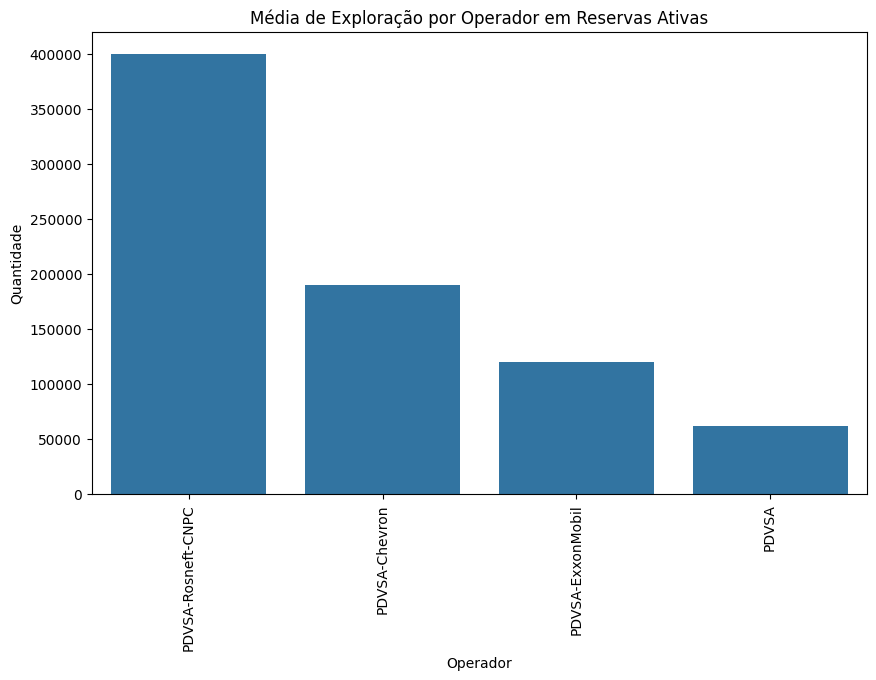

In [87]:
exploracao_por_operador_reservas_ativas = df[df['Status'] == 'Active'].groupby('Major_Operators')['Production_Capacity_Barrels_Day'].mean().sort_values(ascending=False)

plt.subplots(figsize=(10, 6))
sns.barplot(x=exploracao_por_operador_reservas_ativas.index, y=exploracao_por_operador_reservas_ativas.values)
plt.title('Média de Exploração por Operador em Reservas Ativas')
plt.xlabel('Operador')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

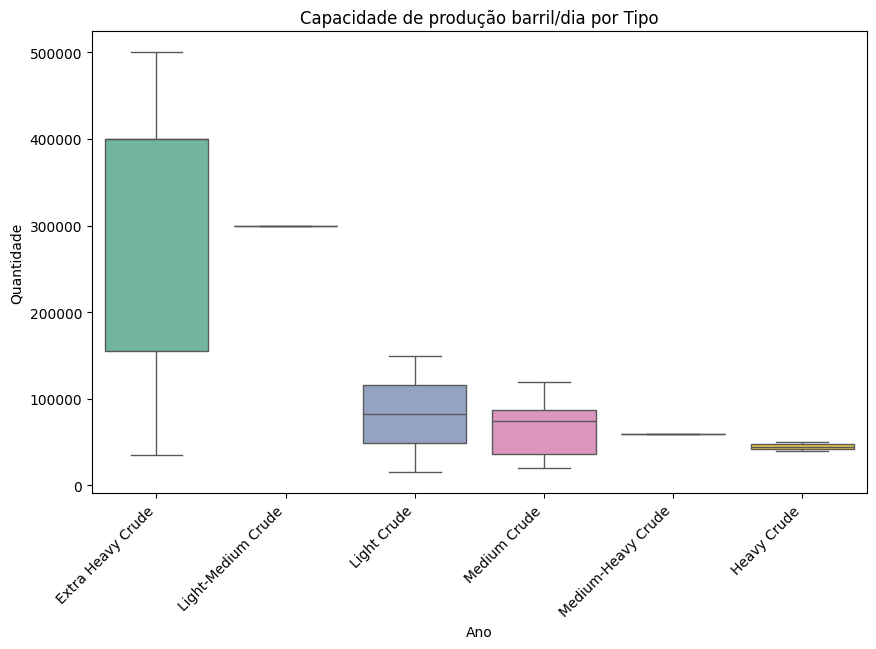

In [88]:
plt.subplots(figsize=(10, 6))
sns.boxplot(x=df['Oil_Type_Grade'], y=df['Production_Capacity_Barrels_Day'], palette = "Set2")
plt.title('Capacidade de produção barril/dia por Tipo')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.show()